In [1]:
import pandas as pd

df = pd.read_csv('../data/clean_weather.csv', sep=',')
df.head(3)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0


In [2]:
df.isna().sum()

Unnamed: 0         0
tmax              11
tmin              14
rain             281
tmax_tomorrow     11
dtype: int64

In [3]:
df = df.ffill()

In [4]:
df.isna().sum()

Unnamed: 0       0
tmax             0
tmin             0
rain             0
tmax_tomorrow    0
dtype: int64

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

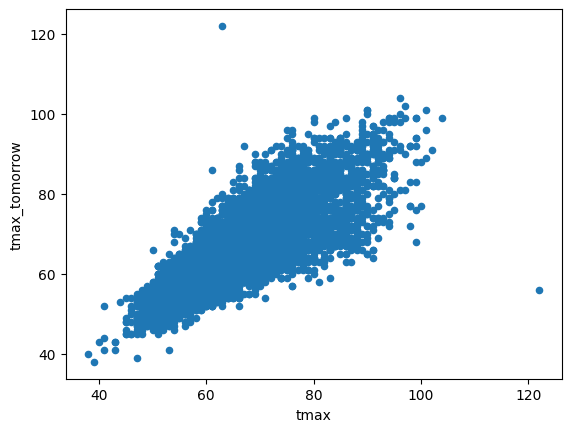

In [5]:
df.plot.scatter("tmax", "tmax_tomorrow")

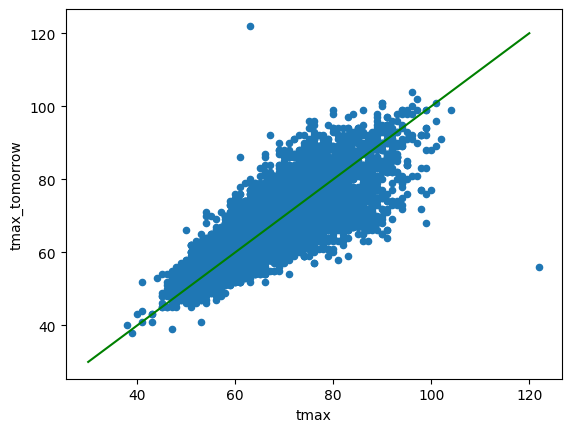

In [6]:
import matplotlib.pyplot as plt

df.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([30, 120], [30, 120], "green")

## $\hat{y} = w_{1} * x_{1} + b$

## $\hat{y} = w_{1} * x_{1} + w_{2} * x_{2}  + b$

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[["tmax"]], df[["tmax_tomorrow"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


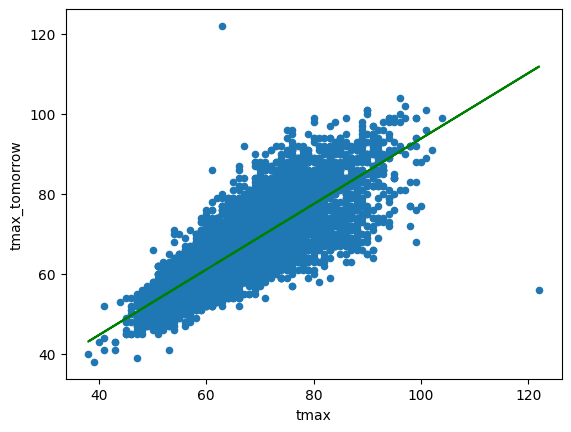

In [8]:
df.plot.scatter("tmax", "tmax_tomorrow")
plt.plot(df["tmax"], lr.predict(df[["tmax"]]), "green")

In [24]:
print(f"Weight: {lr.coef_[0][0]:.2f}")
print(f"Bias: {lr.intercept_[0]:.2f}")


Weight: 0.82
Bias: 11.99


## $\hat{y} = 0.82 * tmax + 11.99$

In [25]:
## C

## Calculate the Error

$ {MSE} = (\hat{y} - {y}) ^ 2 $

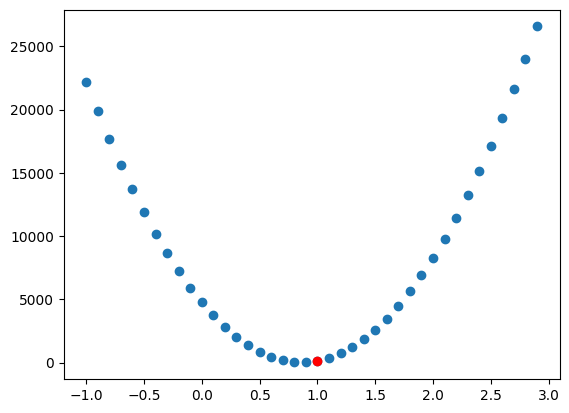

In [34]:
import numpy as np

loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2
y = 81

ws = np.arange(-1, 3, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')

## Find the minimum point in chart Manually

In [36]:
w_chart = 1
(((w_chart * 80) + 11.99) - 81) ** 2

120.78009999999989

In [37]:
w_chart = 0.8
(((w_chart * 80) + 11.99) - 81) ** 2

25.10010000000005

In [38]:
w_chart = 0.7
(((w_chart * 80) + 11.99) - 81) ** 2

169.26010000000014

### Best Point

In [39]:
w_chart = 0.85
(((w_chart * 80) + 11.99) - 81) ** 2

1.0201000000000104

### Calculate it by Math

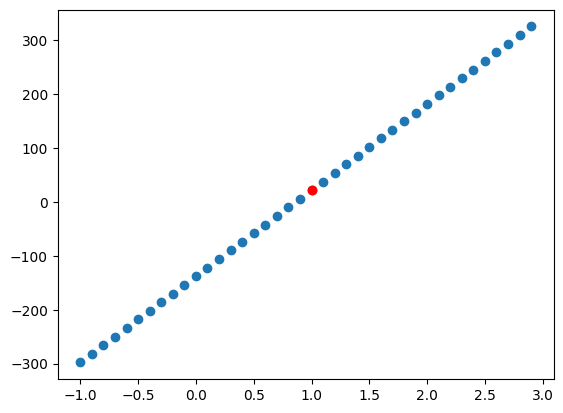

In [40]:
# ws = np.arange(-1, 3, .1)
# y= 81

derivative = lambda w, y: ((w * 80 + 11.99) - y) * 2

gradients = derivative(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, derivative(1, y), 'ro')

### Check new Loss

1758.3999999999992


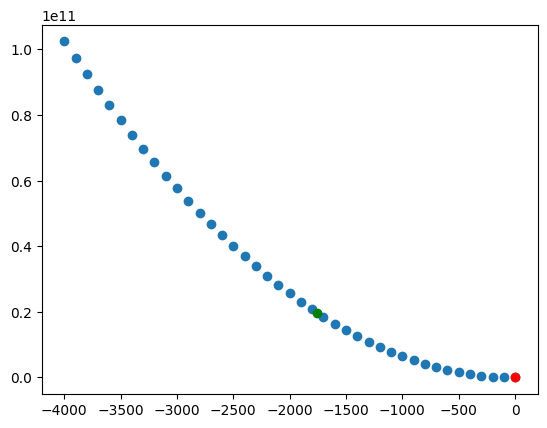

In [44]:
ws = np.arange(-4000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')
print(derivative(1, y) * 80)
new_weight = 1 - derivative(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

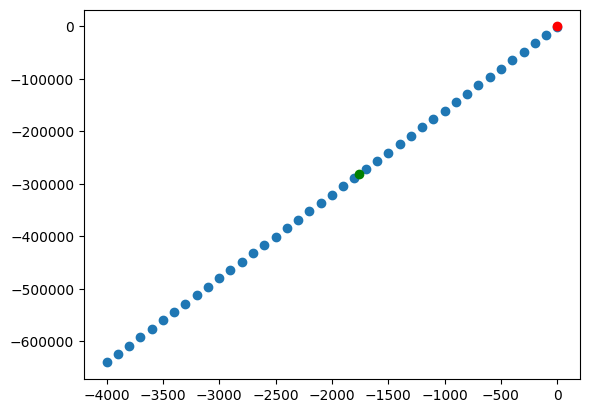

In [45]:
ws = np.arange(-4000, 100, 100)
gradients = derivative(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, derivative(1, y), 'ro')
plt.plot(new_weight, derivative(new_weight, y), 'go')

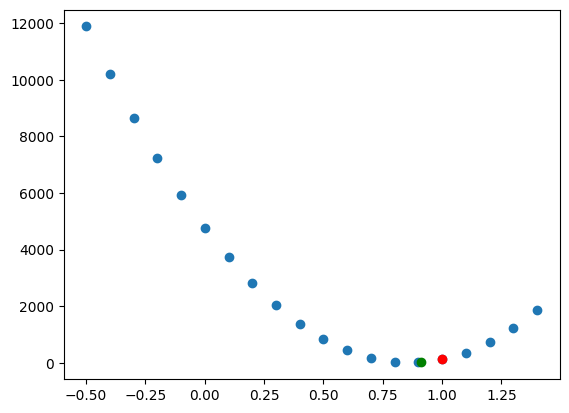

In [48]:
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')
lr = 5e-5
# print(derivative(1, y) * 80)
new_weight = 1 - lr * derivative(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

In [49]:
print(new_weight)

0.91208


#### Implementation

In [50]:
import numpy as np

PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(df, [int(.7 * len(df)), int(.85 * len(df))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

G:\Apply\Deep_Learning_Review\.venv\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [53]:
import math


def init_params(predictors):
    np.random.seed(0)
    weights = np.random.rand(predictors, 1)
    biases = np.ones((1, 1))
    return [weights, biases]

In [54]:
init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [55]:
def forward(params, x):
    weights, biases = params
    prediction = x @ weights + biases
    return prediction

In [56]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    return predicted - actual

In [57]:
def backward(params, x, lr, grad):
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [64]:
lr = 1e-4

epochs = 10000

params = init_params(train_x.shape[1])

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    if i % 1000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} loss: {valid_loss}")

Epoch 0 loss: 31.564020597420274
Epoch 1000 loss: 22.990710196112634
Epoch 2000 loss: 22.67156707384745
Epoch 3000 loss: 22.63937301500581
Epoch 4000 loss: 22.632228246185544
Epoch 5000 loss: 22.628249994764566
Epoch 6000 loss: 22.624707370916596
Epoch 7000 loss: 22.62123192449757
Epoch 8000 loss: 22.61777335806627
Epoch 9000 loss: 22.614324774683425


In [65]:
params

[array([[0.79538512],
        [0.24074601],
        [0.54557468]]),
 array([[1.10194964]])]